In [1]:
from SliceNet import SliceNet
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

W0429 12:49:08.592212 139673529513728 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


1.13.1


Using TensorFlow backend.


importing hub
Instructions for updating:
Colocations handled automatically by placer.


W0429 12:49:09.859248 139673529513728 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [2]:
dataPath = Path('/home/bmmidei/SliceCast/data/train/hdf5_noIntro')
files = [str(x) for x in dataPath.glob('**/*') if x.suffix=='.hdf5']

val_prop = 0.25
mask = random.sample(range(0,len(files)), math.floor(val_prop*len(files)))

# randomly assign some files to validation and the rest to train
train_files = [x for (i,x) in enumerate(files) if i not in mask]
val_files = [x for (i,x) in enumerate(files) if i in mask]
test_file = val_files[0]
print(test_file)

/home/bmmidei/SliceCast/data/train/hdf5_noIntro/batch21_0.hdf5


In [3]:
weights_path = '/home/bmmidei/SliceCast/models/04_20_2019_2300_epoch008.h5'
class_weights = [1.0, 10.0, 0.2]
net = SliceNet(classification=True,
               class_weights=class_weights,
               pretrain=False,
               weights_path=None,
               maxlen=None,
               drop_prob=0,
               reg=1e-2)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0429 12:50:22.815806 139673529513728 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0429 12:50:24.075995 139673529513728 saver.py:1483] Saver not created because there are no variables in the graph to restore


(?, ?, 512)


In [5]:
history, pkscores = net.train(train_files=train_files,
                        val_files=val_files,
                        test_file=test_file,
                        batch_size=8,
                        epochs=40,
                        steps_per_epoch=1000,
                        save=True,
                        k=8)

1.13.1
importing hub
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoderIn (InputLayer)          (None, None)         0                                            
__________________________________________________________________________________________________
encoderOut (Lambda)             (None, None, 512)    0           encoderIn[0][0]                  
__________________________________________________________________________________________________
lstm_1 (Bidirectional)          (None, None, 512)    1576960     encoderOut[0][0]                 
__________________________________________________________________________________________________
lstm_2 (Bidirectional)          (None, None, 512)    1576960     lstm_1[0][0]                     
________________________________________________________________________________________

W0429 12:51:17.764892 139673529513728 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/40
  51/1000 [>.............................] - ETA: 18:30 - loss: 3.9916 - categorical_accuracy: 0.3168

KeyboardInterrupt: 

In [5]:
pkscores.on_train_end()

[0.3357904429266513,
 0.3224576725107649,
 0.3813033815633353,
 0.33809928614216567,
 0.350829372707965,
 0.3534268864807718,
 0.40269539765023593,
 0.30760888242851786,
 0.35034886591531694,
 0.35994193901345806,
 0.34498257376041047,
 0.34499631324682556,
 0.34137053433127157,
 0.3660520312382096,
 0.32963472155974494,
 0.3129456723657136,
 0.30446937049878225,
 0.33081187265966516,
 0.2498251483061104,
 0.3206002794454848,
 0.47061173976808646,
 0.29799024110233313,
 0.28442637109805785,
 0.26965708814787737,
 0.41524899675353427,
 0.3303564023296952,
 0.34922357043907876,
 0.35746535920052874,
 0.3352158936958304,
 0.3967013408757232,
 0.2974678394270357,
 0.26735504415180705,
 0.3337801997878724,
 0.3298735247760735,
 0.3311946254626352,
 0.20014530867312827,
 0.38916927710561955,
 0.3762348590468255,
 0.3148435338714374,
 0.4004945644913315]

# Visualizing Results

## Loss and Accuracy during training

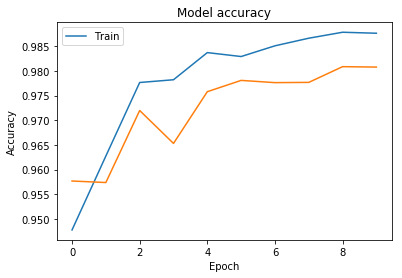

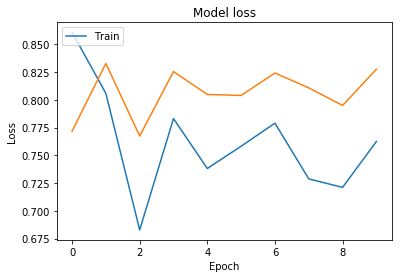

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()